In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
data=pd.read_csv("gld_price_data.csv")

In [4]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
data.shape

(2290, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#Checking missing values
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
#Checking the central tendencies mean median etc
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
#correlation is very important in any regression project
correlation=data.corr()

<AxesSubplot:>

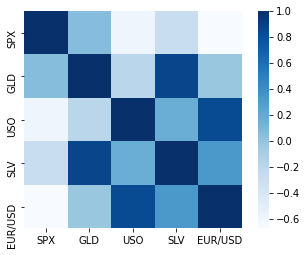

In [10]:
#Contructing heatmap to understand correlation
sns.heatmap(correlation,cmap='Blues',cbar=True, square=True,)

In [11]:
#print correlation of gold
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\SOURAV\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

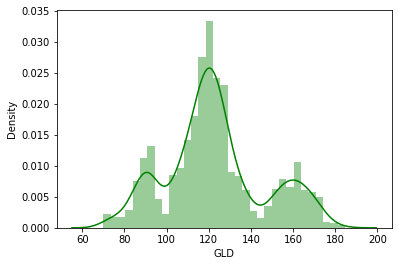

In [13]:
#checking distribution of gold
sns.distplot(data['GLD'],color='green')

In [15]:
X = data.drop(['Date','GLD'],axis=1)
Y = data['GLD']

In [23]:
#Y=a(x1+x2+x3......)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [25]:
model1=RandomForestRegressor(n_estimators=120)
model2=sklearn.linear_model.LinearRegression()
#train model

model1.fit(X_train,Y_train)
model2.fit(X_train,Y_train)

<IPython.core.display.Javascript object>

LinearRegression()

In [26]:
test_prediction1=model1.predict(X_test)
test_prediction1
test_prediction2=model2.predict(X_test)
test_prediction2



array([122.51325689, 127.0907545 , 125.50313349, 104.54764991,
       124.90068634, 116.586858  , 123.04583828, 125.14446632,
       112.05259024, 104.88193814, 101.00127079, 157.04211875,
       137.50447931, 110.49031012, 160.83929478,  88.48009266,
       117.77776928, 118.96072884, 121.53807068, 128.1487556 ,
       118.02290942, 116.08975575, 109.6315024 , 103.05777279,
       111.84096218, 120.86033322, 119.62399827, 112.20020453,
       109.19479998, 119.62171119, 196.11502374,  99.10085802,
       157.19764615, 122.07046494, 113.39777112, 123.34726222,
       132.36268845, 152.08038513, 176.64473496, 145.03588282,
       124.05185863, 121.33549213, 122.74098458, 115.57613444,
       122.35927588, 112.09083408,  93.45476082, 116.93571065,
       126.42056988, 118.08975012, 105.4726357 , 126.56933728,
       105.64602965, 151.78330086, 137.80329213, 117.39236458,
       159.54433502, 126.41884417, 100.17367568, 122.74815137,
       109.79583313,  86.2818531 , 113.37269965, 120.30

In [27]:
#error  finding
err_score1=metrics.r2_score(Y_test,test_prediction1)
err_score2=metrics.r2_score(Y_test,test_prediction2)
err_score2

0.8975640982991402

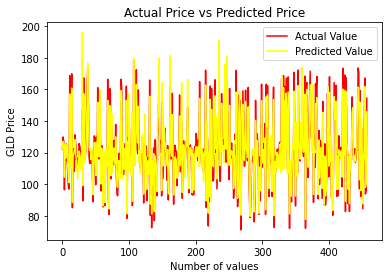

In [28]:
#plot variance
Y_test=list(Y_test)
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_prediction2, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()